# Momentum Based Gradient

    It will calculate exponentially weighted average of the gradient. It will eleminate the oscillation

It will generate momentum speed by calculating exponentially weighted average

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

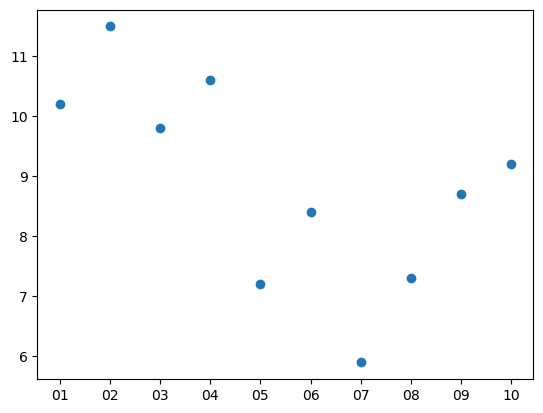

In [2]:

data = {
    "Date": ["01", "02", "03", "04", "05","06", "07", "08", "09", "10"],
    "Temperature (Celsius)": [10.2, 11.5, 9.8, 10.6, 7.2, 8.4, 5.9, 7.3, 8.7, 9.2]
}

df = pd.DataFrame(data)

# Extract x (date) and y (temperature) as lists
x = np.array(df["Date"].tolist())
y = df["Temperature (Celsius)"].tolist()
plt.scatter(x,y)
plt.show()

# Exponential weighted average
It is a moving average based on time

Eg: 

v0 = 0 #it is 0 because it is 1st

v1 = 0.9 * v0 + 0.1 * current_value #it value is calculated based on 90% of previous points and  10% of current point

v2 = 0.9 * v1 + 0.1 * current_value
..... continue

General formula is
$v_t =\beta v_{t-1} + (1 - \beta)current_t$ 

if $\beta$ is increase $(1 - \beta)$ will decrease $\beta$ will control history value ans $(1 - \beta)$ will control current value

Here $\beta$ value from 0 to 1

$$
v_0 = 0\\
$$

$$
v_1 = \beta v_0 + (1-\beta)v_1 \\
    = (1 - \beta) v_1
$$

$$
v_2 = \beta v_1 + (1-\beta)v_2 \\
    = \beta((1-\beta)v_1) + (1-\beta)v_2\\
    = \beta(1-\beta)v_1 + (1 - \beta) v_2
$$

$$
v_3 = \beta v_2 + (1-\beta)v_3\\
    = \beta(\beta(1-\beta)v_1 + (1-\beta)v_2) + (1-\beta) v_3\\
    = \beta^{2}(1-\beta)v_1 + \beta^{1}(1-\beta)v_2 + (1-\beta) v_3\\
$$

$$
v_4 = \beta v_3 + (1-\beta)v_4\\
    = \beta(\beta^{2}(1-\beta)v_1 + \beta^{1}(1-\beta)v_2 + (1-\beta) v_3) + (1-\beta) v_4\\
    = \beta^{3}(1-\beta)v_1 + \beta^{2}(1-\beta)v_2 + \beta^{1}(1-\beta)v_3 + (1-\beta) v_4\\
$$

Now Generalize the formula

$$
v_4 = (1-\beta)(\beta^3 v_1 + \beta^2 v_2 + \beta v_3 + v_4)
$$

if $\beta = 0.9$
$$
With\ power\ 0 \\
\beta^0 = 0.9^0 = 1 \\

$$

$$
With\ power\ 1 \\
\beta^1 = 0.9 ^ 1 = 0.9 \\
$$

$$
With\ power\ 2 \\
\beta^2 = 0.9^2 = 0.81\\
$$

$$
With\ power\ 3 \\
\beta^3 = 0.9^3 =  0.729\\
$$

When power increases value decreases

$$
Now\ relate\ with\ v_4\\
v_4\ is\ the\ current\ value\\
v_4 = (1-\beta)(\beta^3 v_1 + \beta^2 v_2 + \beta v_3 + v_4) = (1-\beta)(v_4 + \beta v_3 + \beta^2 v_2 + \beta^3 v_1 )\\
v_4\ value\ has\ no\ change\\
v_3\ value\ will\ be\ reduced\ compared\ to\  v_4\\
v_2\ value\ will\ be\ reduced\ compared\ to\  v_3\\
likewise....\\
$$

$$
v_t = (1-\beta) (v_t + \beta^1 v_{t-1} + \beta^2 v_{t-2}+ \beta^3 v_{t-3}+ ... +\beta^n v_{t-n})\\
v_t = (1-\beta) * \sum_{k=1}^{n} \beta^{n-k} \theta _{k}
$$
if $v_5$ is current value means $v_4$ value  will be reduced in $v_5$ cycle. With this what we found is current value has more weight age than previous one when time increases older value faded out, So it is called as Weighted moving exponential average


In [3]:
def expoWeightAvg(beta,values):
    oldEwa = 0
    finalValue = []
    for i,value in enumerate(values):
        # if i == 0: #it is not present in formula, if this is present the data point is more accurate
        #     oldEwa = value
        #     finalValue.append(value)
        # else:
        ewa = ((beta) * oldEwa) + ((1 - beta) * (value)) 
        oldEwa = ewa
        finalValue.append(ewa)
       
    return finalValue

In [4]:
def graph(x,y,y1):
    plt.scatter(x,y)
    plt.plot(x,y1)
    plt.show()

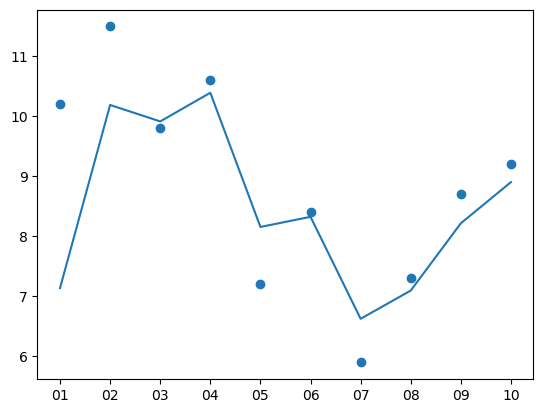

In [5]:
y1 = expoWeightAvg(0.3,y)
graph(x,y,y1)

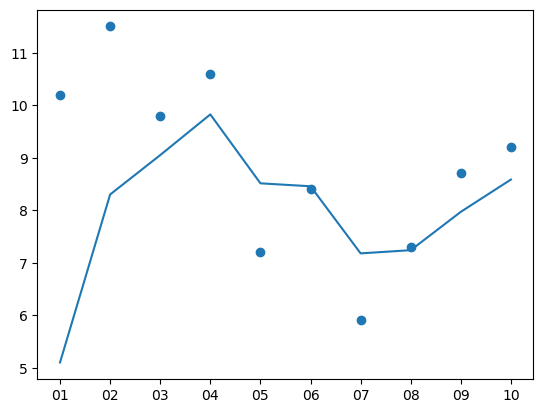

In [6]:
y1 = expoWeightAvg(0.5,y)
graph(x,y,y1)

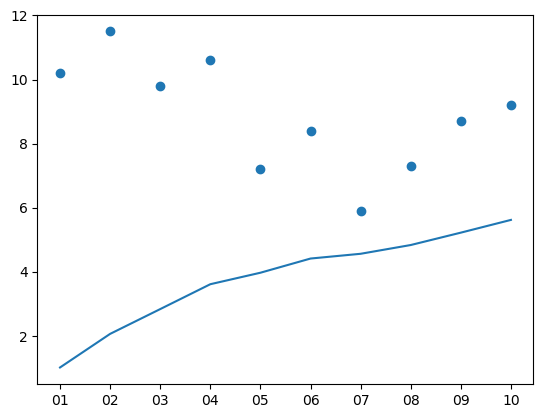

In [7]:
y1 = expoWeightAvg(0.9,y)
graph(x,y,y1)

## Beta value increase more smoother

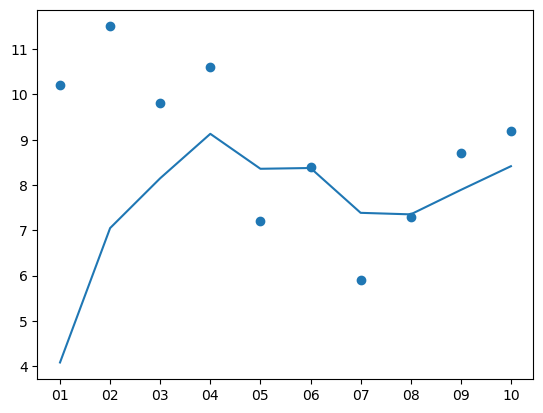

In [8]:
y1 = expoWeightAvg(0.6,y)
graph(x,y,y1)

In [9]:
def fun(x):
    return x ** 2

def der_fun(x):
    return 2 * x + 0.00001

def grad_dec(x, lr):
    return x - (lr * der_fun(x))
        

In [10]:
x = range(-100,101)
y = [fun(i) for i in x]

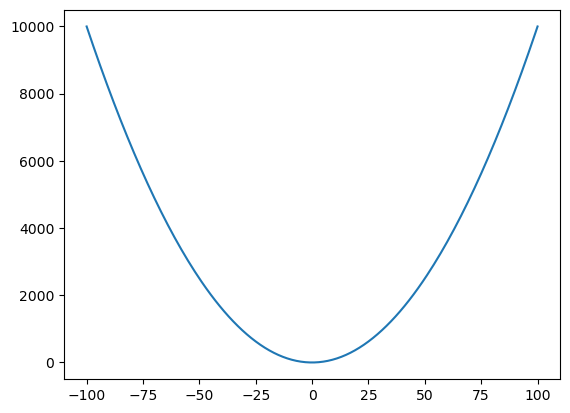

In [11]:
plt.plot(x,y)
plt.show()

88.1999999
86.435999802
84.70727970595999
83.01313401184079
81.35287123160397
79.72581370697189
78.13129733283246
76.56867128617581
75.0372977604523
73.53655170524326


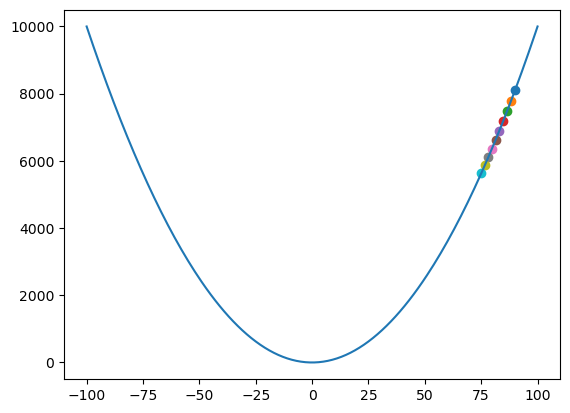

In [12]:
# Without momentum
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = grad_dec(x1,0.01)
    y1 = fun(x1)
    print(x1)
plt.show()

35.2799999
34.9977598608
34.7177777419136
34.44003547997829
34.164515156138464
33.89119899488936
33.62006936293024
33.3511087680268
33.084299857882584
32.81962541901952


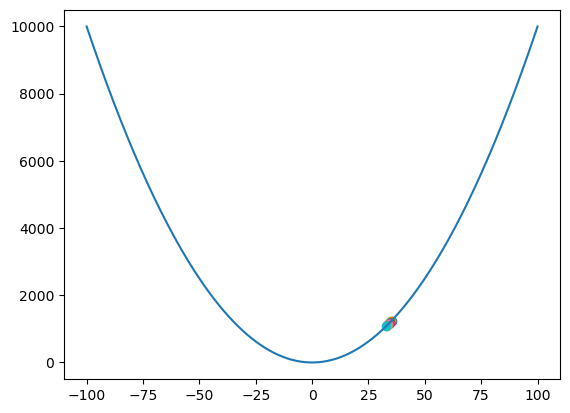

In [13]:
#with moemntum
x1 = 90
ewa = 0
beta = 0.6
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    ewa = (beta * ewa )+ ((1-beta) * x1) # x1 is reduced by 1 - beta percent
    x1 = grad_dec(ewa,0.01) # here the problem is x1 is already reduced by some percent based on beta value and it is now even reduced based on learning rate. So it is slow
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.1999999
84.81599971199999
80.07407944856
74.2048695224928
67.43848309858247
59.999965555091514
52.10530035484783
43.957995567531555
35.74626124759628
27.640775034702607
19.793021842404247
12.334183432487638
5.3745450949129365
-0.9966204108025538
-6.710737057730444


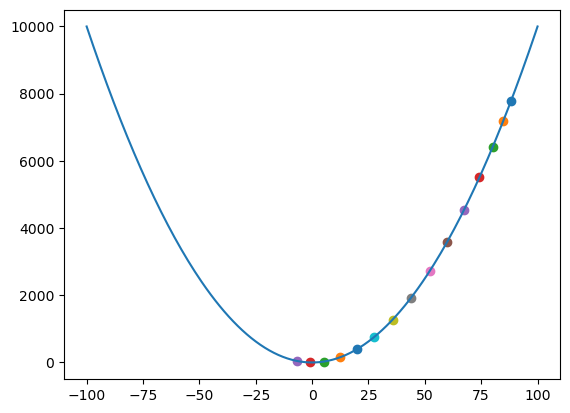

In [14]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ewa = (beta * ewa ) + (0.01 * (2 * x1 + 0.00001))
    x1 -= ewa
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.1999999
84.81599971199999
80.07407944856
74.2048695224928
67.43848309858247
59.999965555091514
52.10530035484783
43.957995567531555
35.74626124759628
27.640775034702607
19.793021842404247
12.334183432487638
5.3745450949129365
-0.9966204108025538
-6.710737057730444


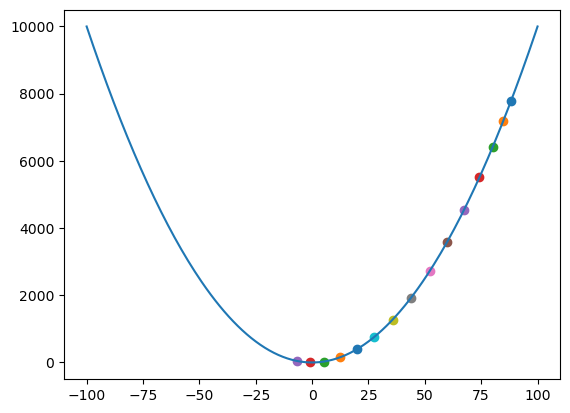

In [15]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ewa = (beta * ewa ) - (0.01 * (2 * x1 + 0.00001)) ## see the intermediate sign
    x1 += ewa ## see the intermediate sign
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

## Modified version of gradient for momentum is converge (downhill) faster

Now we know that $\beta$ value is between 0 to 1, to get the No.of.Samples based on the $\beta$ values

$\frac{1}{1-\beta} = No\ of\ Samples$

Eg: 1
if $\beta = 0.9$ 

$\frac{1}{1-0.9} = \frac{1}{0.1} = 10$ Based on previous 10 values. The current value is calculated 

Eg: 2
if $\beta = 0.98$ 

$\frac{1}{1-0.98} = \frac{1}{0.02} = 50$ Based on previous 50 values. The current value is calculated 


## vice versa
$\frac{1}{1-\beta} = 50$

$\frac{1}{-\beta + 1} = 50$

$1 = -50\beta + 50$

Flip the equation

$-50\beta + 50 = 1$

$-50\beta = 1 - 50$

$\beta = \frac{-49}{-50}$

$\beta = \frac{49}{50} = 0.98$

### Until this the initial point is very low for example if $\beta$ = 0.9 x = [42,43,..] $x = \beta * x_{t-1}+(1-\beta) * x_t$
Based on the formula x for 0th itter is x = 0.9 * 0 + 0.1 * 42 = 4.2  
We get the 1st value as 4.2 but it has a huge difference bcz 1st vale is 42 and from formula got answer is 4.2 these values will better if we run for some larger iteration, but the initial value is small to solve the issue another method is introduced 

$$
v_t = \beta * v_{t-1} + (1-\beta) * v_t \\

v_t^{corrected} = v_t/(1 - \beta^t)
$$

In [16]:
def correctedExpoWeightAvg(beta,values):
    ewa = 0
    oldEwa = 0
    finalValue = []
    for i,value in enumerate(values):
        ewa = ((beta) * oldEwa) + ((1 - beta) * (value)) 
        oldEwa = ewa
        finalValue.append(ewa / (1-(beta**(i+1))))
       
    return finalValue

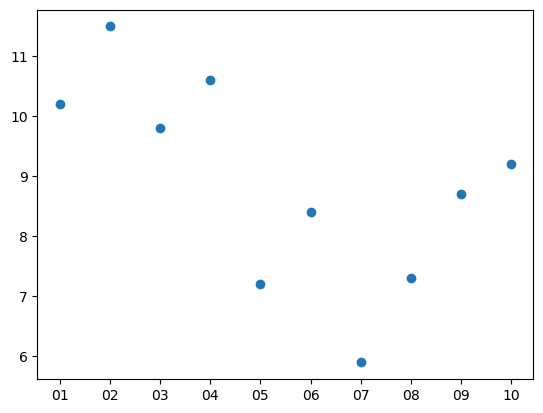

In [17]:
# see the the corrected expo weight for same example
x = np.array(df["Date"].tolist())
y = df["Temperature (Celsius)"].tolist()
plt.scatter(x,y)
plt.show()

[10.2, 11.5, 9.8, 10.6, 7.2, 8.4, 5.9, 7.3, 8.7, 9.2]
[10.2, 11.199999999999998, 10.192805755395684, 10.48016937191249, 8.17845765209459, 8.333650431164319, 6.629722480306443, 7.09894752994744, 8.219706318879473, 8.905915947663079]


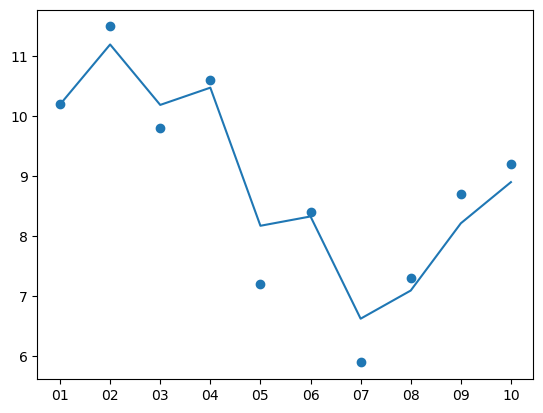

In [18]:
y1 = correctedExpoWeightAvg(0.3,y)
print(y)
print(y1)
graph(x,y,y1)

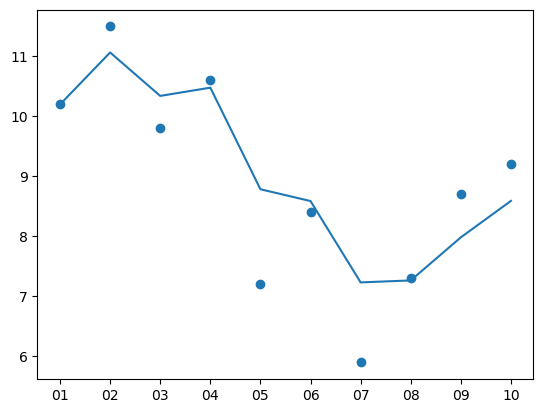

In [19]:
y1 = correctedExpoWeightAvg(0.5,y)
graph(x,y,y1)

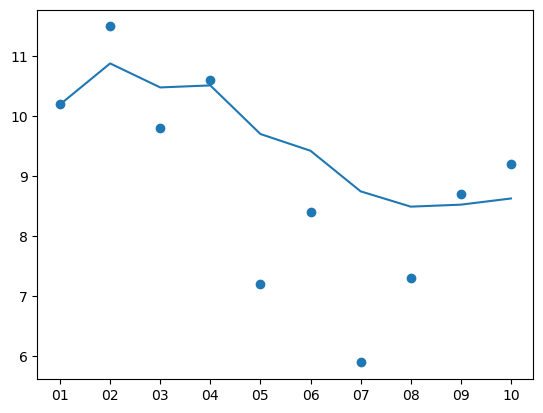

In [20]:
y1 = correctedExpoWeightAvg(0.9,y)
graph(x,y,y1)

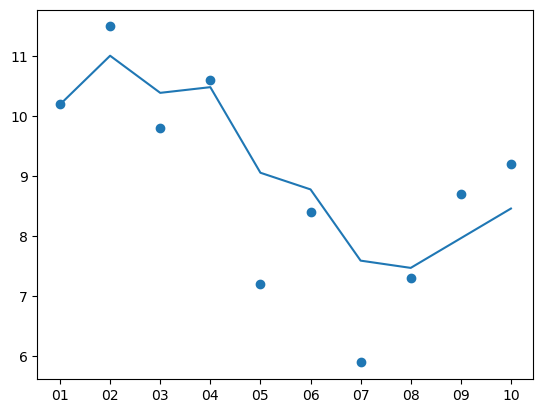

In [21]:
y1 = correctedExpoWeightAvg(0.6,y)
graph(x,y,y1)

# In corrected exponential weighted average the values are more accurate from the 1st sample

In [22]:
x = range(-100,101)
y = [fun(i) for i in x]

88.1999999
87.09749983874998
86.20874978937498
85.41638991079617
84.67544269609459
83.96488744891334
83.27382292547883
82.59625170748619
81.92875482314496
81.26933750016896


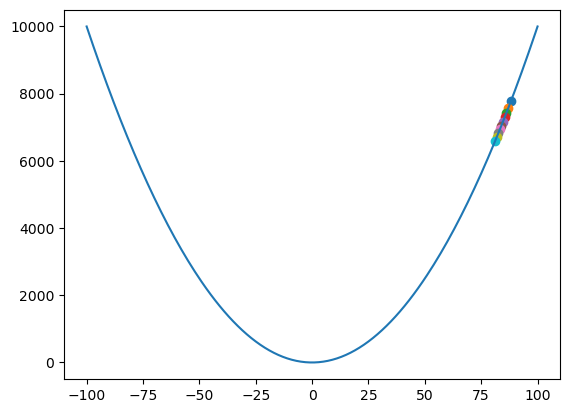

In [23]:
#with moemntum
x1 = 90
ewa = 0
beta = 0.6
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    ewa = (beta * ewa )+ ((1-beta) * x1) # x1 is reduced by 1 - beta percent
    x1 = grad_dec((ewa/(1-(beta**(i+1)))),0.01) # here the problem is x1 is already reduced by some percent based on beta value and it is now even reduced based on learning rate. So it is slow
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

71.999999
55.89473494736842
41.60729970033015
29.054663612050902
18.148312685518388
8.79495452818438
0.897283763104153
-5.645203745106984
-10.935359577270187
-15.077506928220938
-18.176553395390957
-20.33710580676852
-21.66260049065338
-22.25446207470751
-22.211303297851046


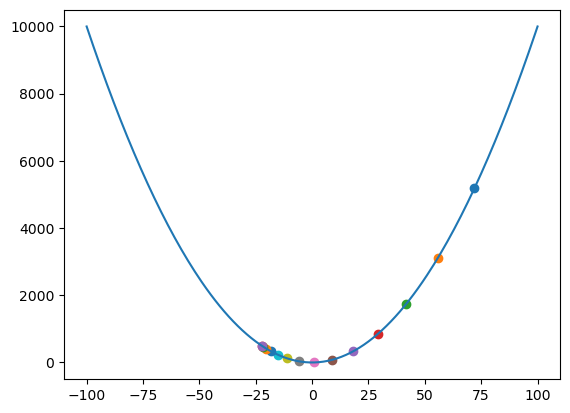

In [24]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ewa = (beta * ewa ) + (0.01 * (2 * x1 + 0.00001))
    x1 -= (ewa/(1-(beta**(i+1))))
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

# Values are converge in faster

## Cons
It can over shoot the value and cause osscilation see that last value is not in 0 actually it is overshooted to -values based on the gained momentum, based on the negative gradient (-ve gradient and gradient descent it self has -ve) and negative momentum again it will comes to +ve side it will osscilate like pendulam. It will converge faster but it will osscilate in last

# Nesterov momentum

It will look ahead before jump

$$
ewaXGrad = \beta * x_{t-1} + (learningRate * \nabla (x - (\beta * x_{t-1}))) \\
x_t = x_t - ewaXGrad
$$

$\nabla (x - (\beta * w_{t-1}))$ here what is happen is gradient of new postion is calculating. Insead of calculating gradient and move, It will move by momentum and calculate gradient

88.1999999
84.84839971379999
80.1953202552956
74.48739766778881
67.96326189225205
60.84970880038358
53.35856069734792
45.684196756523505
38.001723725585904
30.46574793778722
23.20970223419304
16.34567577893911
9.964690829826361
4.137368188112389
-1.0850778456415826


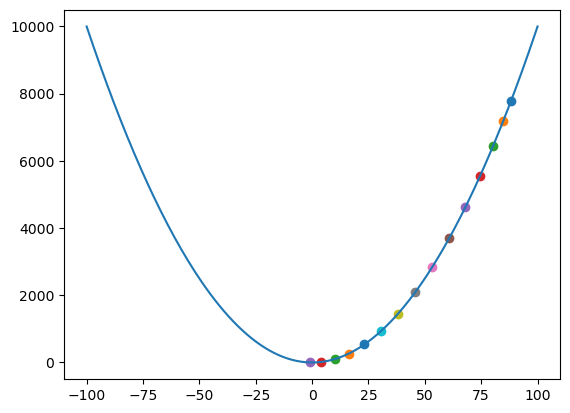

In [25]:
#with Nesterov
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(15):
    ahead = x1 - (beta * ewa ) # the value is move to new position
    ewa = (beta * ewa ) + (0.01 * (2 * ahead + 0.00001)) # compute gradient for new position
    x1 = x1 - ewa
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

## for difference run some long loop 

88.1999999
84.81599971199999
80.07407944856
74.2048695224928
67.43848309858247
59.999965555091514
52.10530035484783
43.957995567531555
35.74626124759628
27.640775034702607
19.793021842404247
12.334183432487638
5.3745450949129365
-0.9966204108025538
-6.710737057730444
-11.719227398810936
-15.99248425780716
-19.51856584574762
-22.301668057979082
-24.360426787827816
-25.72610120893512
-26.44068626375299
-26.554999187814015
-26.126780935712656
-25.21884899010718
-23.89733335926011
-22.230022724312544
-20.284842798373482
-18.128484109060857
-15.825191706498277


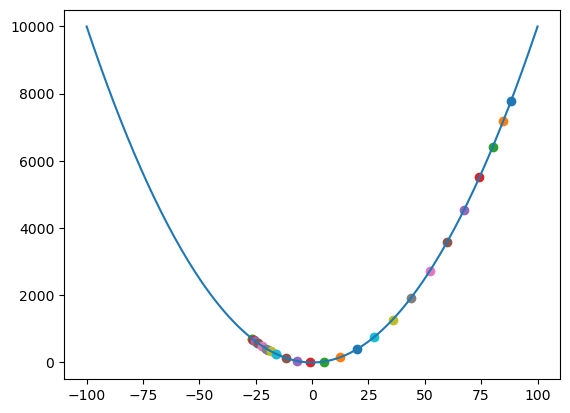

In [26]:
#with moemntum and modified gradient
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):
    ewa = (beta * ewa ) - (0.01 * (2 * x1 + 0.00001)) ## see the intermediate sign
    x1 += ewa ## see the intermediate sign
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.1999999
84.84839971379999
80.1953202552956
74.48739766778881
67.96326189225205
60.84970880038358
53.35856069734792
45.684196756523505
38.001723725585904
30.46574793778722
23.20970223419304
16.34567577893911
9.964690829826361
4.137368188112389
-1.0850778456415826
-5.669573790499754
-9.599707838054666
-12.874092011237005
-15.504617111759089
-17.514648008184384
-18.937202398667807
-19.81315142310083
-20.18947553418874
-20.117603989484504
-19.651861307265676
-18.848039135403358
-17.762107297112724
-16.449073369798132
-14.961996078510698
-13.351154086024966


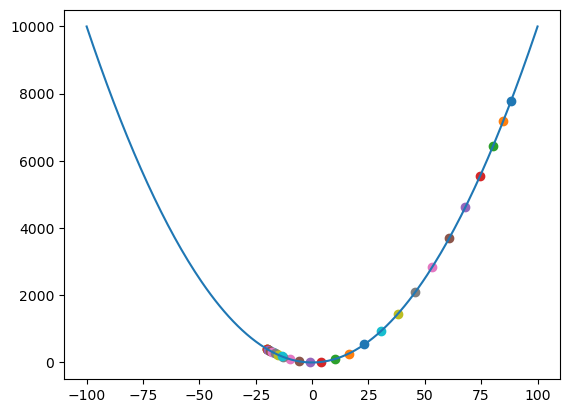

In [27]:
#with Nestrov
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):
    ahead = x1 - (beta * ewa ) # the value is move to new position
    ewa = (beta * ewa ) + (0.01 * (2 * ahead + 0.00001)) # compute gradient for new position
    x1 = x1 - ewa
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

71.999999
56.065261272631574
42.07393775305581
29.902629275716016
19.427057156355485
10.522756310204372
3.065781124594885
-3.0665860725153777
-7.995134265720566
-11.83804097900622
-14.710217437607106
-16.722691117300585
-17.982034419520115
-18.589847310886363
-18.642300704913
-18.22974617087433
-17.436396262581386
-16.340078402714205
-15.012063871941672
-13.516972071589917
-11.91274888793528
-10.250716716682286
-8.575692535879242
-6.926169368401803
-5.334555570588542
-3.827465636115056
-2.4260556231635544
-1.146395902795072
0.00012631322084688534
1.006382280840539


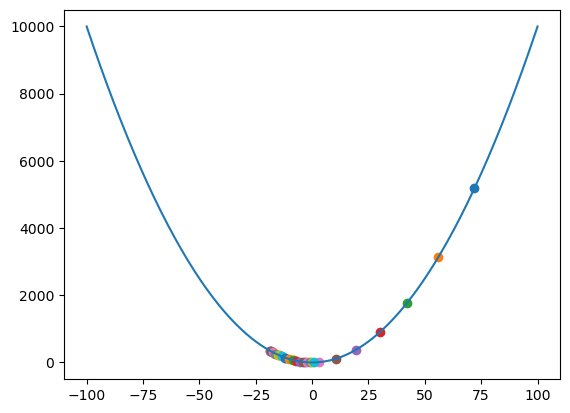

In [28]:
# Nesterov with corrected exponential weighted average
x1 = 90
ewa = 0
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):
    ahead = x1 - (beta * ewa ) # the value is move to new position
    ewa = (beta * ewa ) + (0.01 * (2 * ahead + 0.00001)) # compute gradient for new position
    x1 = x1 - (ewa/(1-beta**(i+1)))
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

### From graph it is visible that nesterov has less osscilation

# RMS Prop
Root Mean Square propogation
Mini batch or Sophisticated Gradient Descent had a lot of osscilation (loss higher and lower) due to the randmon sample and the converging time also very slow.  
RMS prop will take the weighted average of gradient and divide by current gradient

$$
Vx_t = (\beta * Vx_{t-1}) + (1 - \beta) * (\nabla x * \nabla x) \\
x = x - lr * (\nabla x / \sqrt{Vx_t + \epsilon}) \\
$$

89.92928932193591
89.87905698423226
89.83784627949947
89.80198462211125
89.76975382925386
89.740188880868
89.71268467616946
89.68683259029166
89.66234150963807
89.63899546508526
89.61662906518663
89.59511236937578
89.57434111679977
89.55423016265226
89.53470892291699
89.51571812445243
89.49720743077904
89.47913367159134
89.46145949849209
89.44415234797862
89.42718363005113
89.41052808525431
89.39416326933437
89.37806913588628
89.36222769516102
89.3466227327242
89.33123957562772
89.31606489665232
89.30108654931762
89.28629342795557


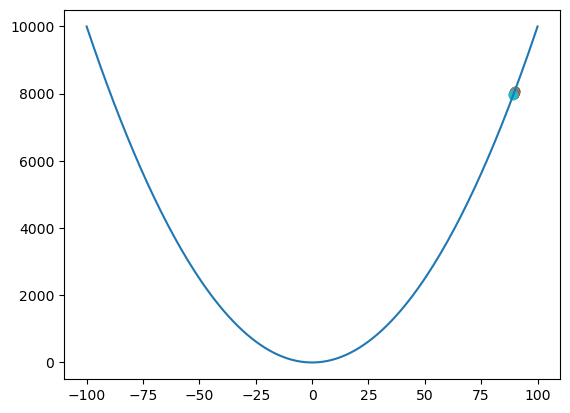

In [29]:
x1 = 90
ewa = 0
lr = 0.01
beta = 0.98
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):

    grad = (2 * x1 + 0.00001)
    ewa = (beta * ewa ) + ((1 - beta) * (grad * grad))
    grad = grad/math.sqrt(ewa + 0.000001)
    x1 = x1 - (lr * grad)
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

80.0000000154321
73.31893496490521
68.05858875092385
63.634939354162675
59.77978680923554
56.34411204109201
53.235122572132546
50.39045045584305
47.76580745954885
45.32840932849451
43.05318386874038
40.92044630081544
38.91440292487436
37.02214885147883
35.23297405436571
33.53786924695369
31.929165493536722
30.40026583425084
28.945441760979108
27.559676377109685
26.238541799237026
24.97810209873706
23.774835581367853
22.625571909566403
21.527440758853697
20.477829539114378
19.474348314374566
18.51480049382325
17.597158190826423
16.719541388597413


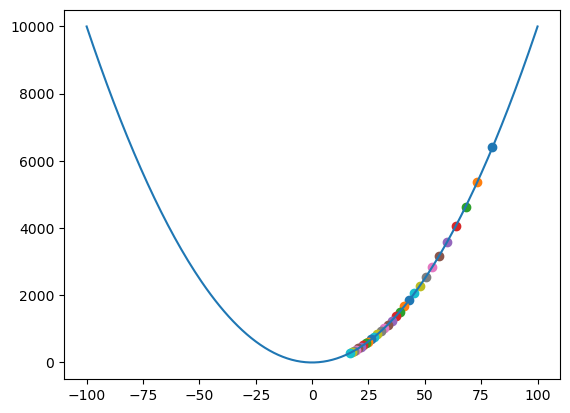

In [30]:
#RMS Prop modified for gradient
x1 = 90
ewa = 0
beta = 0.98
lr = 0.01
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):

    grad = (2 * x1 + 0.00001)
    ewa = (beta * ewa ) + (lr * (grad * grad))
    grad = grad/math.sqrt(ewa + 0.000001)
    x1 = x1 - (grad)
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

88.58578643767055
87.18270373433577
85.790766979451
84.40999200300823
83.04039536144334
81.68199432254191
80.33480684930215
78.998851582713
77.67414782340454
76.36071551212716
75.05857520901543
73.76774807159191
72.48825583146575
71.22012076968066
69.96336569066641
68.71801389474786
67.48408914916578
66.26161565756352
65.05061802789393
63.85112123870166
62.66315060373617
61.486731734851936
60.32189050315309
59.16865299834133
58.02704548622698
56.897094364365294
55.778826115781705
54.672267260752335
53.57744430660846
52.49438369553677


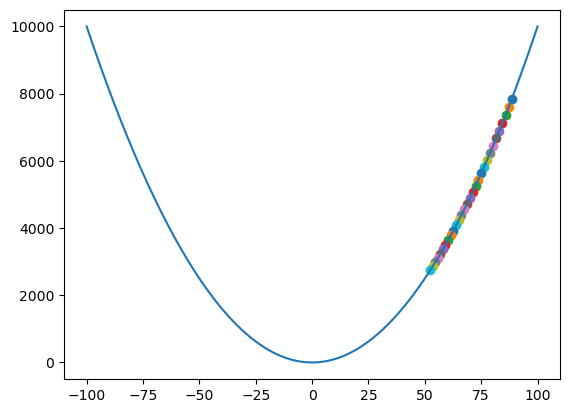

In [34]:
# RMS prop with corrected exponential weighted average
x1 = 90
ewa = 0
beta = 0.98
lr = 0.01
corrected = 0
y1 = fun(x1)

plt.plot(x,y)
for i in range(30):
    grad = (2 * x1 + 0.00001)
    ewa = (beta * ewa ) + ((lr) * (grad * grad))
    cewa = (ewa/(1-beta**(i+1)))
    grad = grad/math.sqrt(cewa + 0.000001)
    x1 = x1 - grad
    y1 = fun(x1)
    plt.scatter(x1,y1)
    print(x1)
plt.show()

Next [Learningrate](./LearningRate.ipynb)